In [118]:
# Machine Learning for the project
# Oran Howard 18672266
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fifa_results_final = pd.read_csv('fifa_results_elo.csv')
fifa_results_final = fifa_results_final.drop(fifa_results_final.columns[[0]], axis=1)   
fifa_results_final

,FTR,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,ASH,HST,AST,...,HomeTeamPoints,AwayTeamPoints,total_home_points,total_away_points,avg_home_goals,avg_away_goals,avg_HST,avg_AST,HomeTeamELO,AwayTeamELO
0,H,2014-08-16,Arsenal,Crystal Palace,2,1,14,4,6,2,...,3,0,3,0,2.157895,1.368421,7.421053,3.894737,1863.169312,1871.476196
1,D,2014-08-16,Leicester,Everton,2,2,11,13,3,3,...,1,1,1,1,1.473684,1.105263,4.368421,2.894737,1874.532227,1874.532227
2,A,2014-08-16,Man United,Swansea,1,2,14,5,5,4,...,0,3,0,3,2.157895,1.000000,5.473684,4.210526,1869.615234,1869.615234
3,A,2014-08-16,QPR,Hull,0,1,19,11,6,4,...,0,3,0,3,1.210526,0.736842,4.736842,3.894737,1875.418335,1875.418335
4,A,2014-08-16,Stoke,Aston Villa,0,1,12,7,2,2,...,0,3,0,3,1.684211,0.684211,4.105263,4.263158,1878.388916,1878.388916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,A,2021-03-15,Wolves,Liverpool,0,1,10,12,5,4,...,0,3,19,23,1.071429,1.857143,4.785714,3.857143,1874.515869,1874.515869
2566,A,2021-03-19,Fulham,Leeds,1,2,13,13,6,4,...,0,3,10,21,0.562500,1.733333,3.562500,4.466667,1874.515869,1874.515869
2567,H,2021-03-20,Brighton,Newcastle,3,0,11,3,6,1,...,3,0,13,12,1.066667,0.733333,4.266667,4.266667,1878.339966,1878.339966
2568,D,2021-03-21,West Ham,Arsenal,3,3,15,16,5,7,...,1,1,28,21,1.733333,1.466667,4.533333,2.866667,1883.798706,1883.798706


In [119]:
# testing different features to see what performs best
# all data including in game data 
#classification_data = fifa_results_final.drop(fifa_results_final.columns[[1,4,5,29,32,33,34,35]], axis=1)

#classification_data = fifa_results_final[['FTR','Date','HomeTeam','AwayTeam','FTHG','FTAG','HS',
                                         #  'ASH','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','B365H',
                                         #  'B365D','B365A','HTR','HTP','HTW','HTV','ATR','ATP','ATW','ATV',
                                        #   'season','TotalGoals','Difference_Rating','HomeTeamRes','AwayTeamRes',
                                        #   'HomeTeamPoints','AwayTeamPoints','total_home_points','total_away_points',
                                        #   'HomeTeamELO','AwayTeamELO','avg_home_goals','avg_away_goals','avg_HST',
                                       #  'avg_AST']]

classification_data = fifa_results_final[['FTR','HomeTeam','AwayTeam','B365H',
                                           'B365D','B365A','HTR','ATR',#,'HTP','HTW','HTV','ATP','ATW','ATV',
                                           'Difference_Rating',
                                           #'total_home_points','total_away_points',
                                           #'HomeTeamELO','AwayTeamELO',
                                          'avg_home_goals','avg_away_goals','avg_HST',
                                         'avg_AST']]


#classification_data = fifa_results_final[['FTR','HomeTeam','AwayTeam','B365H',
                                          # 'B365D','B365A',
                                           #'total_home_points','total_away_points',
                                           #'HomeTeamELO','AwayTeamELO','avg_home_goals','avg_away_goals','avg_HST',
                                        # 'avg_AST']]
classification_data


,FTR,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,ATR,Difference_Rating,avg_home_goals,avg_away_goals,avg_HST,avg_AST
0,H,Arsenal,Crystal Palace,1.25,6.50,15.00,79.347826,72.173913,7.173913,2.157895,1.368421,7.421053,3.894737
1,D,Leicester,Everton,3.20,3.40,2.40,69.391304,76.782609,-7.391304,1.473684,1.105263,4.368421,2.894737
2,A,Man United,Swansea,1.36,5.00,11.00,78.304348,72.782609,5.521739,2.157895,1.000000,5.473684,4.210526
3,A,QPR,Hull,2.50,3.30,3.10,74.217391,72.347826,1.869565,1.210526,0.736842,4.736842,3.894737
4,A,Stoke,Aston Villa,1.95,3.50,4.50,74.347826,73.478261,0.869565,1.684211,0.684211,4.105263,4.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,A,Wolves,Liverpool,4.75,3.75,1.72,74.043478,82.086957,-8.043478,1.071429,1.857143,4.785714,3.857143
2566,A,Fulham,Leeds,2.37,3.40,3.00,73.347826,70.826087,2.521739,0.562500,1.733333,3.562500,4.466667
2567,H,Brighton,Newcastle,1.66,3.50,6.00,74.130435,76.217391,-2.086957,1.066667,0.733333,4.266667,4.266667
2568,D,West Ham,Arsenal,2.80,3.50,2.45,76.217391,77.913043,-1.695652,1.733333,1.466667,4.533333,2.866667


In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

HomeTeam = labelencoder.fit_transform(fifa_results_final['HomeTeam'])
AwayTeam = labelencoder.fit_transform(fifa_results_final['AwayTeam'])

classification_data['HomeTeam'] = HomeTeam
classification_data['AwayTeam'] = AwayTeam

#df_val = classification_data.values
df_val = classification_data.values

#assigns all the columns except the first column to the variable X
X = df_val[:,1:40]
#assigns only the first column as variable Y
Y = df_val[:,0]

Y_label = labelencoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_label, test_size=0.15,random_state=20,shuffle=True)

df_X_train = pd.DataFrame(X_train)#, columns=columns)
X = pd.DataFrame(X)

df_X_test = pd.DataFrame(X_test)
df_Y_test = pd.DataFrame(Y_test)

home_team_train = df_X_test[0]
home_team_num_list = home_team_train.tolist()

away_team_train = df_X_test[1]
away_team_num_list = away_team_train.tolist() 

In [121]:
#testtest 
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
input_classes = fifa_results_final['HomeTeam'].unique()
label_encoder.fit(input_classes)

labels_home = fifa_results_final['HomeTeam'].unique()
encoded_labels = label_encoder.transform(labels_home)
home_team_name = label_encoder.inverse_transform(home_team_num_list)
home_team_name[0]

input_classes_away = fifa_results_final['AwayTeam'].unique()
label_encoder.fit(input_classes_away)

labels_away = fifa_results_final['AwayTeam'].unique()
encoded_labels_away = label_encoder.transform(labels_away)
away_team_name = label_encoder.inverse_transform(away_team_num_list)

print(encoded_labels_away)

[ 7  8 25 11  1 24 26 22 15  6 18 13 29  0 28  4 23 16 20 14 27 19  2 17
 10  3  5 30  9 21 12]


In [122]:
target_names = ['Away Win', 'Draw', 'Home Win']


rfc5 = RandomForestClassifier(n_estimators=1000,min_samples_leaf=5)
#Builds a forest of trees from the training set (X, y).
rfc5.fit(X_train, Y_train)
#The same steps are repeated that were performed on the MLP Classifier
rfc5_predict = rfc5.predict(X_test)
confusion_matrix(Y_test, rfc5_predict)
print('\nRandom Forest for 5 leaf nodes:')
print(classification_report(Y_test, rfc5_predict, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, rfc5_predict))
predictions = rfc5.predict_proba(X_test)
# convert to %
predictions = predictions*100
all_predictions = []
for i in range(len(predictions)):
    print('\nProbability of Home Win, Draw, Away Win\n',home_team_name[i],'vs',away_team_name[i],'\n',predictions[i][2],'%',predictions[i][1],'%',predictions[i][0],'%')
    #print('HTR',df_X_test[2][i], 'ATR',df_X_test[6][i], df_Y_test[0][i])
    print('HTR',df_X_test[1][i], 'ATR',df_X_test[2][i], df_Y_test[0][i])
    all_predictions.append(predictions)
    
#The same is repeated for 50 leaf nodes instead of 5.
rfc50 = RandomForestClassifier(n_estimators=1000,min_samples_leaf=50)
rfc50.fit(X_train, Y_train)
rfc50_predict = rfc50.predict(X_test)
confusion_matrix(Y_test, rfc50_predict)
print('\nRandom Forest for 50 leaf nodes:')
print(classification_report(Y_test, rfc50_predict, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, rfc50_predict))
predictions = rfc50.predict_proba(X_test)
print('\nProbability of Home Win, Draw, Away Win\n',predictions)



Random Forest for 5 leaf nodes:
              precision    recall  f1-score   support

    Away Win       0.54      0.54      0.54       111
        Draw       0.32      0.17      0.23        92
    Home Win       0.56      0.69      0.62       183

    accuracy                           0.53       386
   macro avg       0.47      0.47      0.46       386
weighted avg       0.50      0.53      0.50       386

accuracy =  0.5259067357512953

Probability of Home Win, Draw, Away Win
 Hull vs Swansea 
 42.36066475406257 % 29.622294951350685 % 28.01704029458672 %
HTR 25 ATR 2.55 2

Probability of Home Win, Draw, Away Win
 Everton vs Liverpool 
 26.910567878394474 % 22.513004093429792 % 50.57642802817573 %
HTR 14 ATR 4.2 1

Probability of Home Win, Draw, Away Win
 Arsenal vs Sheffield United 
 61.278172365989704 % 23.528740360516707 % 15.193087273493624 %
HTR 21 ATR 1.57 2

Probability of Home Win, Draw, Away Win
 Burnley vs West Brom 
 63.57652397009599 % 26.574212177571336 % 9.84926385233

 Southampton vs Bournemouth 
 51.22901012171523 % 25.840358989565658 % 22.93063088871913 %
HTR 2 ATR 1.65 1

Probability of Home Win, Draw, Away Win
 Chelsea vs Leicester 
 67.60142173744737 % 28.55358688138483 % 3.8449913811678518 %
HTR 13 ATR 1.2 2

Probability of Home Win, Draw, Away Win
 Tottenham vs QPR 
 67.18731188488151 % 16.324126422253364 % 16.488561692865098 %
HTR 20 ATR 1.45 2

Probability of Home Win, Draw, Away Win
 Watford vs Swansea 
 64.31959661941087 % 18.958963579992975 % 16.721439800596166 %
HTR 25 ATR 1.66 0

Probability of Home Win, Draw, Away Win
 Man City vs Chelsea 
 40.69849885081865 % 34.665344622185806 % 24.636156526995517 %
HTR 6 ATR 2.15 0

Probability of Home Win, Draw, Away Win
 Tottenham vs Sheffield United 
 64.10522703431758 % 24.521676601262488 % 11.373096364419908 %
HTR 21 ATR 1.57 1

Probability of Home Win, Draw, Away Win
 Liverpool vs Sheffield United 
 63.35483362354876 % 13.591488136906099 % 23.053678239545132 %
HTR 21 ATR 1.22 2

Probability o

HTR 23 ATR 2.7 0

Probability of Home Win, Draw, Away Win
 Sunderland vs West Ham 
 19.390859918375437 % 24.319414994190545 % 56.289725087434114 %
HTR 29 ATR 3.3 1

Probability of Home Win, Draw, Away Win
 Man United vs Hull 
 73.81612761096608 % 13.836893575102454 % 12.346978813931473 %
HTR 11 ATR 1.2 1

Probability of Home Win, Draw, Away Win
 Arsenal vs Brighton 
 62.12658863925895 % 27.598706191039753 % 10.274705169701315 %
HTR 3 ATR 1.57 0

Probability of Home Win, Draw, Away Win
 Chelsea vs West Ham 
 64.7827196307304 % 22.668425638259222 % 12.548854731010318 %
HTR 29 ATR 1.28 0

Probability of Home Win, Draw, Away Win
 Arsenal vs Liverpool 
 40.23952118897839 % 38.74279611195852 % 21.01768269906312 %
HTR 14 ATR 1.75 1

Probability of Home Win, Draw, Away Win
 Liverpool vs Bournemouth 
 84.05583603573935 % 10.86961383731508 % 5.074550126945645 %
HTR 2 ATR 1.36 1

Probability of Home Win, Draw, Away Win
 Brighton vs Arsenal 
 34.934009712505954 % 40.159488082138154 % 24.9065022053

 28.512694624776707 % 26.051813740525027 % 45.43549163469831 %
HTR 6 ATR 3.0 2

Probability of Home Win, Draw, Away Win
 Swansea vs Aston Villa 
 71.00956628167147 % 14.87456022735435 % 14.115873490974124 %
HTR 1 ATR 1.67 2

Probability of Home Win, Draw, Away Win
 Aston Villa vs Burnley 
 71.74468088370175 % 15.640650054280083 % 12.614669062018152 %
HTR 4 ATR 1.75 1

Probability of Home Win, Draw, Away Win
 Tottenham vs Everton 
 49.00242608318109 % 25.08434727132923 % 25.913226645489768 %
HTR 8 ATR 1.83 0

Probability of Home Win, Draw, Away Win
 Everton vs Tottenham 
 33.202470113735586 % 37.88086570021636 % 28.91666418604802 %
HTR 26 ATR 3.2 1

Probability of Home Win, Draw, Away Win
 Southampton vs Aston Villa 
 31.94962820289443 % 31.861508995820127 % 36.18886280128537 %
HTR 1 ATR 2.8 0

Probability of Home Win, Draw, Away Win
 West Brom vs Middlesbrough 
 59.543303229857415 % 26.57929433569531 % 13.877402434447312 %
HTR 17 ATR 2.6 1

Probability of Home Win, Draw, Away Win
 Man 

HTR 11 ATR 1.53 2

Probability of Home Win, Draw, Away Win
 Newcastle vs Leeds 
 33.89804460086886 % 16.948557854684026 % 49.15339754444716 %
HTR 12 ATR 3.9 0

Probability of Home Win, Draw, Away Win
 Crystal Palace vs Fulham 
 67.63492813387167 % 21.62540591546396 % 10.739665950664422 %
HTR 9 ATR 2.05 2

Probability of Home Win, Draw, Away Win
 Brighton vs Newcastle 
 48.66915857362448 % 18.114537074552576 % 33.216304351822934 %
HTR 18 ATR 1.9 1

Probability of Home Win, Draw, Away Win
 Liverpool vs Sunderland 
 69.62119689593843 % 21.0171568369711 % 9.36164626709048 %
HTR 24 ATR 1.5 1

Probability of Home Win, Draw, Away Win
 West Ham vs Bournemouth 
 37.05934842032748 % 32.46455092207414 % 30.47610065759833 %
HTR 2 ATR 1.95 2

Probability of Home Win, Draw, Away Win
 Burnley vs Middlesbrough 
 57.97901785778723 % 23.777883234326744 % 18.24309890788606 %
HTR 17 ATR 2.9 2

Probability of Home Win, Draw, Away Win
 Tottenham vs Leeds 
 54.31647840092584 % 20.91689777800461 % 24.76662382

Randon forest, with 1 trees :
 
accuracy = 0.4896373056994819

               precision    recall  f1-score   support

    Away Win       0.50      0.50      0.50       111
        Draw       0.26      0.20      0.23        92
    Home Win       0.56      0.63      0.59       183

    accuracy                           0.49       386
   macro avg       0.44      0.44      0.44       386
weighted avg       0.47      0.49      0.48       386

Randon forest, with 2 trees :
 
accuracy = 0.4896373056994819

               precision    recall  f1-score   support

    Away Win       0.50      0.51      0.50       111
        Draw       0.25      0.16      0.20        92
    Home Win       0.56      0.64      0.60       183

    accuracy                           0.49       386
   macro avg       0.43      0.44      0.43       386
weighted avg       0.47      0.49      0.47       386

Randon forest, with 10 trees :
 
accuracy = 0.5284974093264249

               precision    recall  f1-score  

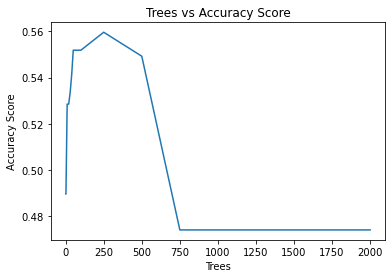

In [123]:
tree_accuracy_scores = []
trees = [1, 2, 10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000] 
for i in trees: # For each value in list
    rfclf = RandomForestClassifier(n_estimators=1000,min_samples_leaf=i)
    rfclf.fit(X_train, Y_train)
    rfclf_predict = rfclf.predict(X_test)
    tree_accuracy=accuracy_score(Y_test, rfclf_predict) 
    tree_accuracy_scores.append(tree_accuracy)
    print('Randon forest, with',i,'trees :\n \naccuracy =', accuracy_score(Y_test, rfclf_predict))
    print('\n',classification_report(Y_test, rfclf_predict, target_names=target_names)) 

plt.figure()   
plt.plot(trees, tree_accuracy_scores) 
plt.ylabel('Accuracy Score') 
plt.xlabel('Trees') 
plt.title('Trees vs Accuracy Score')

print(tree_accuracy_scores)


Artifical Neural Network, with 10 epochs :
 
accuracy = 0.533678756476684

               precision    recall  f1-score   support

    Away Win       0.48      0.53      0.50       111
        Draw       0.00      0.00      0.00        92
    Home Win       0.56      0.80      0.66       183

    accuracy                           0.53       386
   macro avg       0.35      0.44      0.39       386
weighted avg       0.40      0.53      0.46       386

Artifical Neural Network, with 20 epochs :
 
accuracy = 0.5310880829015544

               precision    recall  f1-score   support

    Away Win       0.47      0.58      0.52       111
        Draw       0.00      0.00      0.00        92
    Home Win       0.57      0.77      0.65       183

    accuracy                           0.53       386
   macro avg       0.34      0.45      0.39       386
weighted avg       0.40      0.53      0.46       386

Artifical Neural Network, with 30 epochs :
 
accuracy = 0.5440414507772021

         

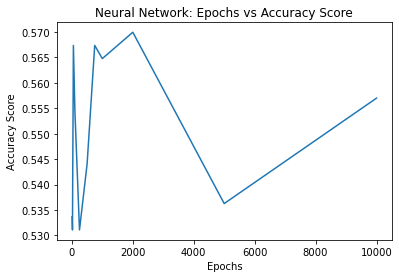

In [125]:
import warnings
warnings.filterwarnings('ignore')
# artificial neural network (ANN)
# using the sklearn library to create an artificial neural network
# activation method as logistic use the sigmoid function as the non-linear activation function for the hidden layers 
# returns f(x) = 1 / (1 + exp(-x)) (scikit-learn, n.d.)
# hidden_layer_sizestuple, length = n_layers - 2, default=(100,)
# so setting 500,4 = 500 neurons in each hidden layer and 2 hidden layers
# Multi-layer Perceptron classifier = MLP
# max_iter value = number of epochs. 200 is default. 
# Fit the model to data matrix X and targets y.
# Predict using the multi-layer perceptron classifier 
# different numbers of epochs to monitor how accuracy changes as the
# algorithm keeps learning, which you can plot using the number of epochs in the ‘x’ axis
# and the accuracy in ‘y’ axis.

ann_accuracy_scores = []
epochs = [10, 20, 30, 40, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000] 
NN_accuracies = [] # Create list to store accuracy scores
for i in epochs: # For each value in list
    mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', max_iter=i)
    mlp.fit(X_train, Y_train)
    Y_predictions = mlp.predict(X_test)
    ann_accuracy=accuracy_score(Y_test, Y_predictions) 
    ann_accuracy_scores.append(ann_accuracy)
    print('Artifical Neural Network, with',i,'epochs :\n \naccuracy =', accuracy_score(Y_test, Y_predictions))
    print('\n',classification_report(Y_test, Y_predictions, target_names=target_names)) 
    
plt.figure()   
plt.plot(epochs, ann_accuracy_scores) 
plt.ylabel('Accuracy Score') 
plt.xlabel('Epochs') 
plt.title('Neural Network: Epochs vs Accuracy Score')

print(ann_accuracy_scores)


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print('Cross Validation Scores for ANN Classifier with 50 hidden layers:')
scores_ANN50 = cross_val_score(MLPClassifier(activation='logistic', hidden_layer_sizes=(50,50)), X, Y, cv=10)
print(scores_ANN50)
print('mean = ', np.mean(scores_ANN50))

print('\nCross Validation Scores for ANN Classifier with 500 hidden layers:')
scores_ANN500 = cross_val_score(MLPClassifier(activation='logistic', hidden_layer_sizes=(500,500)), X, Y, cv=10)
print(scores_ANN500)
print('mean = ', np.mean(scores_ANN500))

print('\nCross Validation Scores for ANN Classifier with 1000 hidden layers:')
scores_ANN1000 = cross_val_score(MLPClassifier(activation='logistic', hidden_layer_sizes=(1000,1000)), X, Y, cv=10)
print(scores_ANN1000)
print('mean = ', np.mean(scores_ANN1000))

print('\nCross Validation Scores for Random Forest Classifier with 20 trees:')
scores_rfc20 = cross_val_score(RandomForestClassifier(n_estimators=20), X, Y, cv=10)
print(scores_rfc20)
print('mean = ', np.mean(scores_rfc20))

print('\nCross Validation Scores for Random Forest Classifier with 500 trees:')
scores_rfc500 = cross_val_score(RandomForestClassifier(n_estimators=500), X, Y, cv=10)
print(scores_rfc500)
print('mean = ', np.mean(scores_rfc500))

print('\nCross Validation Scores for Random Forest Classifier with 1,000 trees')
scores_rfc1000= cross_val_score(RandomForestClassifier(n_estimators=1000), X, Y, cv=10)
print(scores_rfc1000)
print('mean = ', np.mean(scores_rfc1000))


In [102]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, Y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
print(classification_report(Y_test, dtree_predictions, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, dtree_predictions))


              precision    recall  f1-score   support

    Away Win       0.37      0.65      0.47       111
        Draw       0.14      0.01      0.02        92
    Home Win       0.58      0.59      0.59       183

    accuracy                           0.47       386
   macro avg       0.37      0.42      0.36       386
weighted avg       0.42      0.47      0.42       386

accuracy =  0.4689119170984456


In [103]:
# training a linear SVM classifier
from sklearn.svm import SVC

svm_model_linear = SVC(kernel = 'linear', max_iter=100).fit(X_train, Y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
print(classification_report(Y_test, svm_predictions, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, svm_predictions))


              precision    recall  f1-score   support

    Away Win       0.30      0.50      0.37       111
        Draw       0.23      0.35      0.27        92
    Home Win       0.44      0.15      0.22       183

    accuracy                           0.30       386
   macro avg       0.32      0.33      0.29       386
weighted avg       0.35      0.30      0.28       386

accuracy =  0.29533678756476683


In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, Y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(Y_test, knn_predictions)

print(classification_report(Y_test, knn_predictions, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, knn_predictions))


              precision    recall  f1-score   support

    Away Win       0.39      0.52      0.44       111
        Draw       0.21      0.15      0.18        92
    Home Win       0.54      0.50      0.52       183

    accuracy                           0.42       386
   macro avg       0.38      0.39      0.38       386
weighted avg       0.42      0.42      0.41       386

accuracy =  0.422279792746114


In [112]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, Y_test)

# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)
print(classification_report(Y_test, gnb_predictions, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, gnb_predictions))


              precision    recall  f1-score   support

    Away Win       0.54      0.59      0.57       111
        Draw       0.28      0.43      0.34        92
    Home Win       0.68      0.45      0.54       183

    accuracy                           0.49       386
   macro avg       0.50      0.49      0.48       386
weighted avg       0.54      0.49      0.50       386

accuracy =  0.48704663212435234


In [117]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier()
snn_classifier.fit(X_train, Y_train)
snn_predictions = snn_classifier.predict(X_test)
print(classification_report(Y_test, snn_predictions, target_names=target_names))
print('accuracy = ', accuracy_score(Y_test, snn_predictions))



              precision    recall  f1-score   support

    Away Win       0.56      0.56      0.56       111
        Draw       0.18      0.07      0.10        92
    Home Win       0.59      0.78      0.67       183

    accuracy                           0.55       386
   macro avg       0.44      0.47      0.44       386
weighted avg       0.48      0.55      0.50       386

accuracy =  0.5466321243523317
